<a href="https://colab.research.google.com/github/wellmej/DataScienceUseCases/blob/main/Case5_My_Public_Relations_Department_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Analyzing Customer Sentiment
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1HfZvPCWAwKoYl1qogYlxD_CIZYxYw0aI)

![alt text](https://drive.google.com/uc?id=1XGc89Cxi0ooFQIc6o041cz8-qwXg7l3g)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
reviews_file = '/content/drive/MyDrive/Colab Notebooks/Data Science Case Studies/Case5/amazon_alexa.tsv'
reviews_df = pd.read_csv(reviews_file, sep = '\t')  # to read tab separated data file
reviews_df.head(25)
#
# File is reviews of Amazon Echo.
#
# variation: Type of Echo finish or sytle
# verified_reviews: Text of the review
# feedback: 1 = rating was either 4 or 5 (positive review), 0 = rating was 1 or 2 (negative review)
#

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
reviews_df.describe()
#
# File description shows ratings are mostly good, mean of 4.5
#

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# TASK #3: EXPLORE DATASET

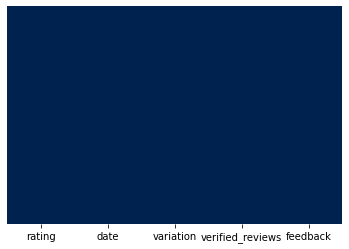

In [7]:
#-----------------------------------------------------------------
# Plot heatmap to see if there is any missing data
#-----------------------------------------------------------------
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar=False, cmap='cividis')
#
# No missing data :-)
#

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c11fb9be0>,
      dtype=object)

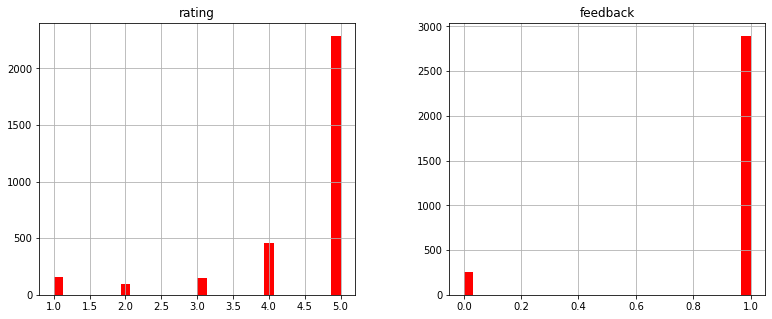

In [8]:
#----------------------------------------------------------------------
# Display Histogram of numerical fields in the dataframe
#---------------------------------------------------------------------- 
reviews_df.hist(bins = 30, figsize=(13,5), color='red')
#
# Shows strong positive ratings
#

In [9]:
#-----------------------------------------------------------------------
# Show informatiomn about the text reviews
#
# 1. Add additional column for the length of the review
#-----------------------------------------------------------------------
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head(10)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,172
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,114


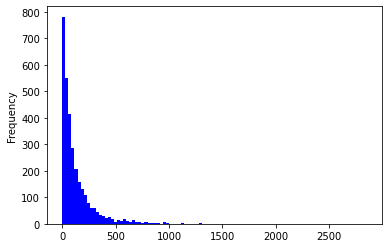

In [10]:
#---------------------------------------------------------------
# Plot Histogram for Length of reviews
#---------------------------------------------------------------
reviews_df['length'].plot(bins=100, kind='hist', color='blue')
#
# Most reviews are relatively short
#

In [11]:
#---------------------------------------------------------
# Display the following:
#
# 1. Review with the shorted review length
# 2. Review with the longest review length
# 3. Review(s) with the mean review length
#---------------------------------------------------------
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [12]:
#
# 1. Longest
#
longest_review = max(reviews_df['length'])
reviews_df[reviews_df['length'] == max(reviews_df['length'])]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [13]:
#
# 2. Shortest
#
shortest_review = min(reviews_df['length'])
reviews_df[reviews_df['length'] == min(reviews_df['length'])]['verified_reviews'].iloc[0]

'😍'

In [14]:
#
# 3. Average
#
avg_review = 132
reviews_df[reviews_df['length'] == avg_review]['verified_reviews'].iloc[0]


'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [15]:
#----------------------------------------
# Create Dataframe for Positive reviews
# based on Feedback value
#----------------------------------------
positive_df = reviews_df[reviews_df['feedback'] == 1 ]
positive_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [16]:
#----------------------------------------
# Create Dataframe for Negative reviews
# based on Feedback value
#----------------------------------------
negative_df = reviews_df[reviews_df['feedback'] == 0 ]
negative_df

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


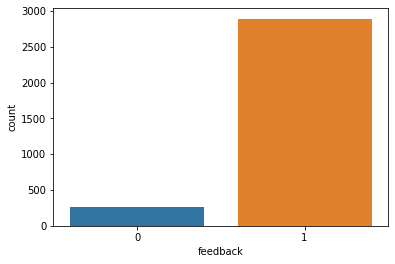

In [17]:
sns.countplot(reviews_df['feedback'], label = 'Count')

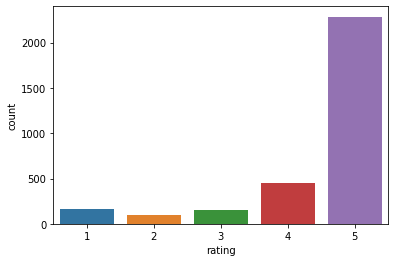

In [18]:
#---------------------------------------------
# Plot ratings column
#---------------------------------------------
sns.countplot(x = 'rating', data = reviews_df)

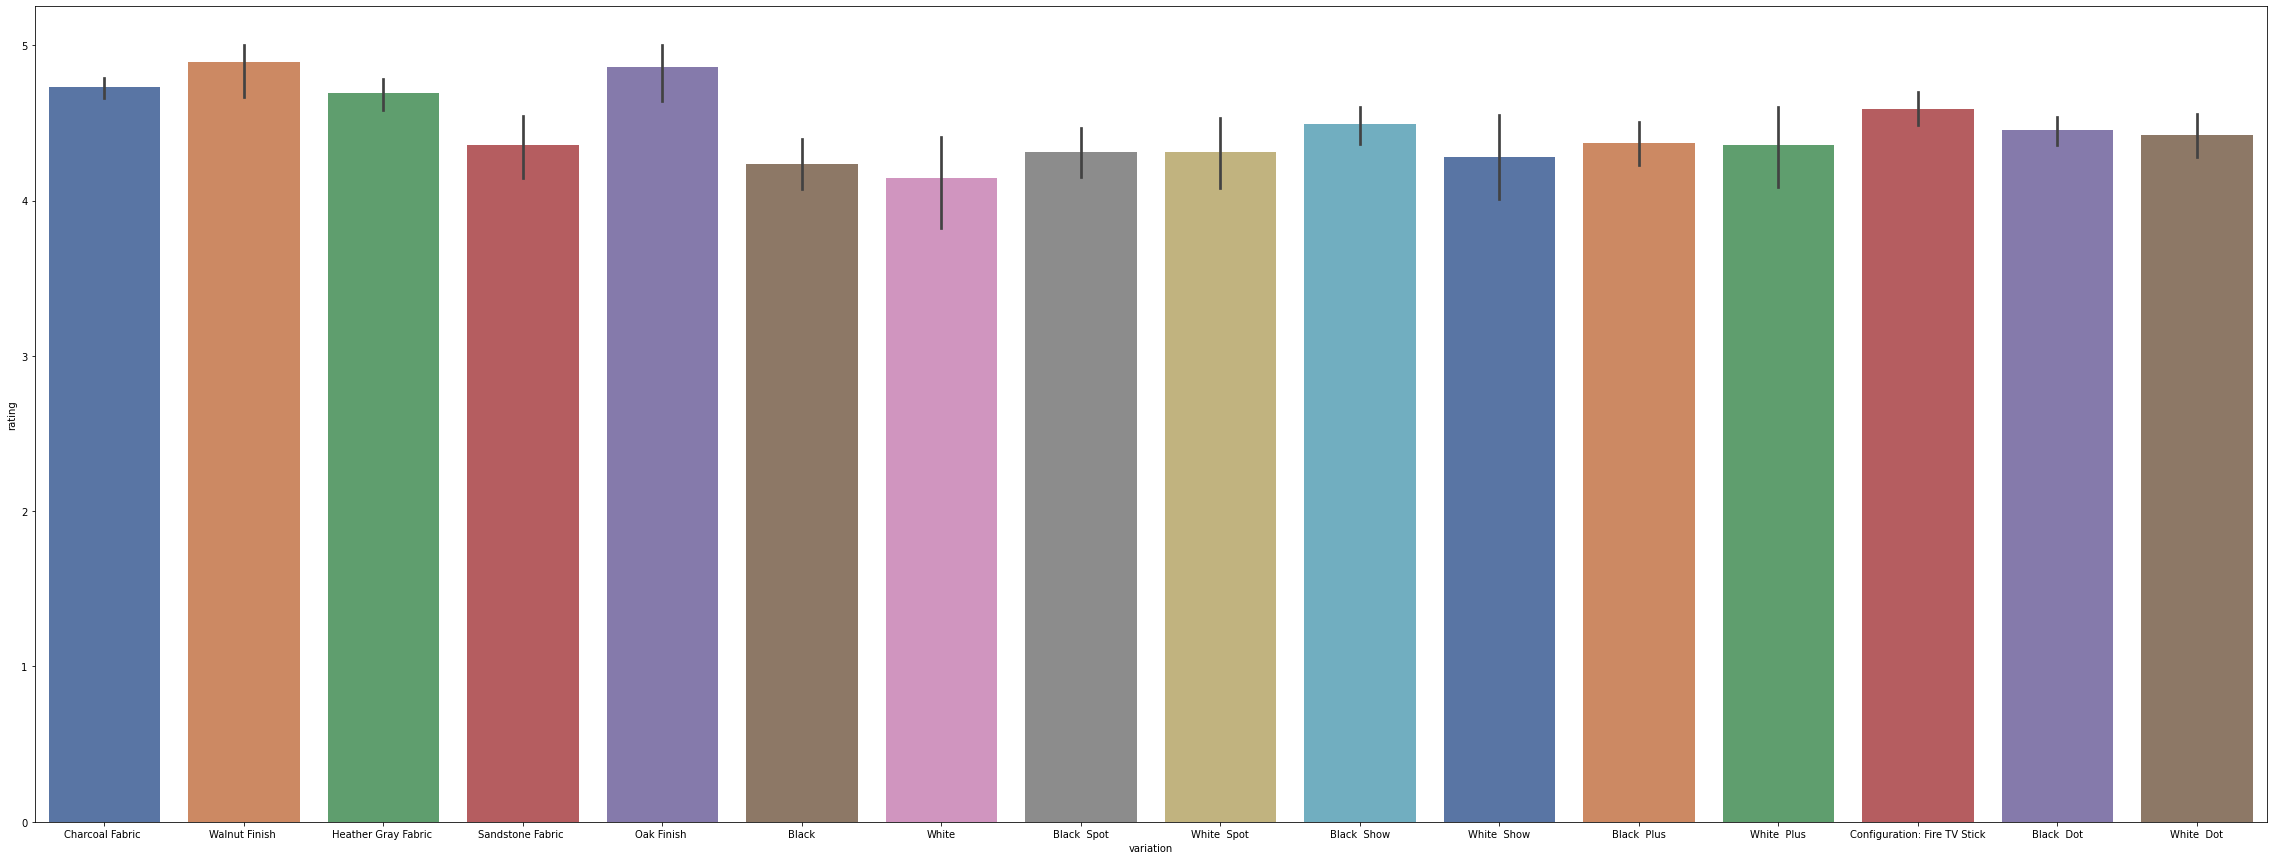

In [19]:
#---------------------------------------------
# Compare 'variation' column related to
# 'rating' column
#---------------------------------------------
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating', data=reviews_df, palette='deep')

In [20]:
#------------------------------------------------------------------------------
# Draw WORDCLOUD to visualize the common
# words in the review data
#
#  Step 1 - Break reviews in to large sentence list
#------------------------------------------------------------------------------
sentences = reviews_df['verified_reviews'].tolist()
sentences[0:15]

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [22]:
#------------------------------------------------------------------------------
# Draw WORDCLOUD to visualize the common
# words in the review data
#
#  Step 2 - Joins all sentences into one string
#------------------------------------------------------------------------------
sentences_as_one_string = " ".join(sentences)

In [23]:
#---------------------------------------------------------------------
# Locate a specific occurence of a word in the sentence
# and print out some text before and aftere that word
#---------------------------------------------------------------------
BEFORE_LENGTH = 25
AFTER_LENGTH = 25
word_index = sentences_as_one_string.find('dot')
#print (word_index)
print (sentences_as_one_string[word_index-BEFORE_LENGTH:word_index+AFTER_LENGTH])

one! I purchased an echo dot for my husband for Fa


In [ ]:
sentences_as_one_string[0:250]  # List first 251 characters

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with t'

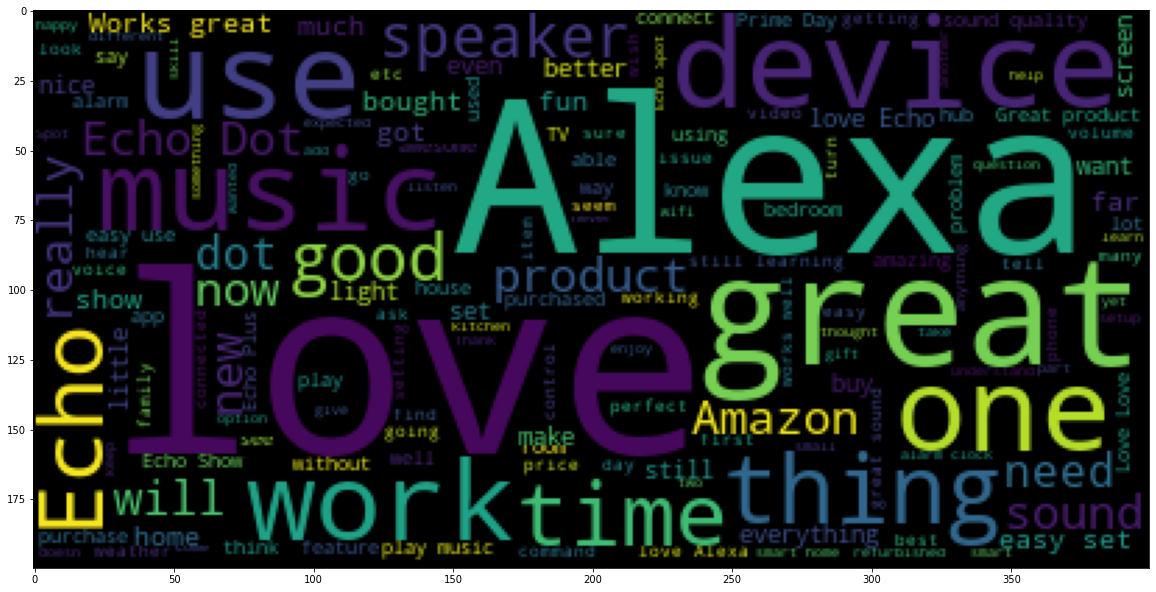

In [24]:
#------------------------------------------------------------------------------
# Draw WORDCLOUD to visualize the common
# words in the review data
#
#  Step 3 - Display WordCloud Image  (All Reviews)
#------------------------------------------------------------------------------
from wordcloud import WordCloud
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

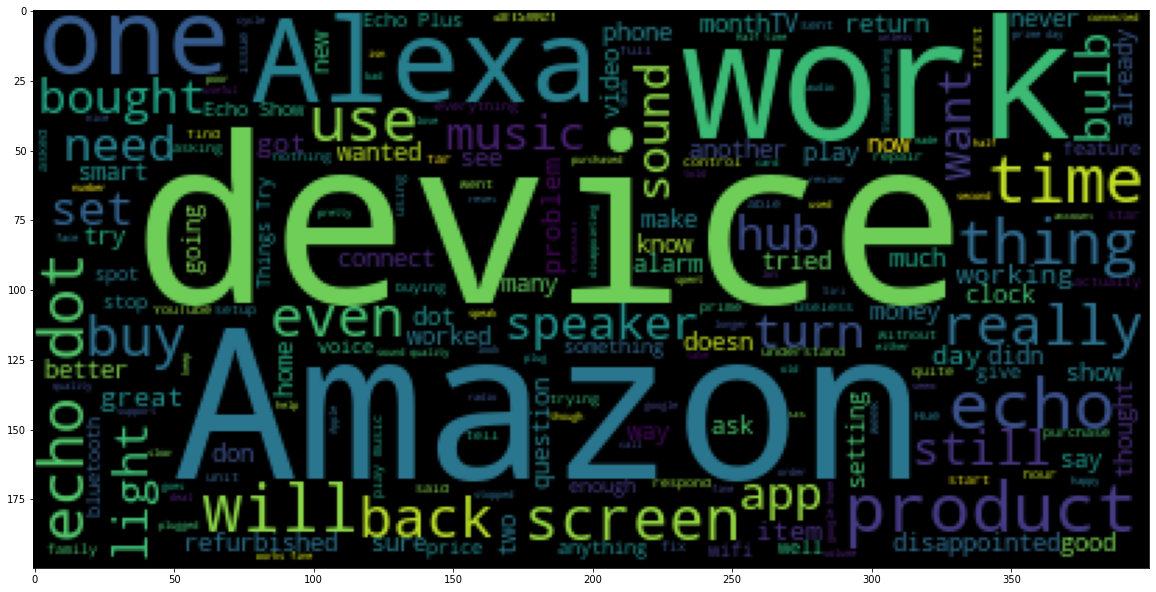

In [25]:
#------------------------------------------------------------------------------
# Draw WORDCLOUD to visualize the common
# words in the NEGATIVE review data
#------------------------------------------------------------------------------
sentences_neg = negative_df['verified_reviews'].tolist()
sentences_as_one_string_neg = " ".join(sentences_neg)

from wordcloud import WordCloud
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_string_neg))

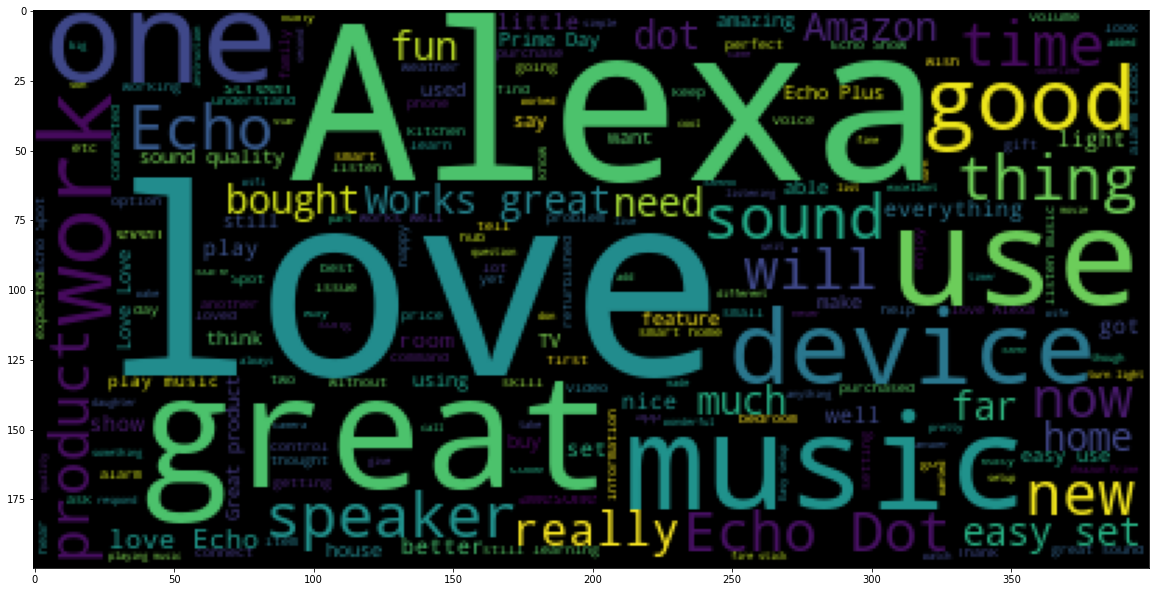

In [26]:
#------------------------------------------------------------------------------
# Draw WORDCLOUD to visualize the common
# words in the POSTIVE review data
#------------------------------------------------------------------------------
sentences_pos = positive_df['verified_reviews'].tolist()
sentences_as_one_string_pos = " ".join(sentences_pos)

from wordcloud import WordCloud
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_string_pos))

# TASK #4: PERFORM DATA CLEANING

In [27]:
#----------------------------------------------------------
# Drop data columns that we no longer needed
# 
# Drop: date, rating, length
#----------------------------------------------------------
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis=1)

In [28]:
reviews_df.head(10)

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
5,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,Heather Gray Fabric,looks great,1
9,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [29]:
#----------------------------------------------------------
# Encode 'variation' column into categorical dummy variables
#----------------------------------------------------------
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)  # drop_first avoids the dummy variable trap where one column is not needed

In [30]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:
reviews_df.drop(['variation'], axis=1, inplace=True)  # Get rid of 'variation' columns all rows

In [32]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1) # Combine variation_dummies columns to the reviews_df dataframe

In [33]:
reviews_df # List our new dataframe

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# TASK #5: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
test = "Hello Mr. Future, I am so happy to be learning AI now - and also drinking beer!!"

In [36]:
test_punc_removed = [char for char in test  if char not in string.punctuation]

In [37]:
#test_punc_removed

In [38]:
test_punc_removed = ''.join(test_punc_removed)

In [39]:
test_punc_removed

'Hello Mr Future I am so happy to be learning AI now  and also drinking beer'

In [40]:
#--------------------------------------------------------------------------------------
# Remove punctuation from review text
#--------------------------------------------------------------------------------------
sentences_as_one_string_nopunc_char = [char for char in sentences_as_one_string  if char not in string.punctuation]
sentences_as_one_string_nopunc = ''.join(sentences_as_one_string_nopunc_char)


# TASK 6: UNDERSTAND HOW TO REMOVE STOPWORDS

In [41]:
#---------------------------------------------------
# Import NLTK to use the STOPWORD libraries
#---------------------------------------------------
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
#--------------------------------------------------------------------------------
# Customize stopwords if necessary (by adding word1, word2, word-n, etc.)
#
# This code below is from my work with NLP
#
#  Remove "Alexa" and "Amazon" then redraw the Wordcloud
#--------------------------------------------------------------------------------
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['alexa','amazon', 'echo', 'dot', 'echodot']
stopwords.extend(newStopWords)
stop_words = stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

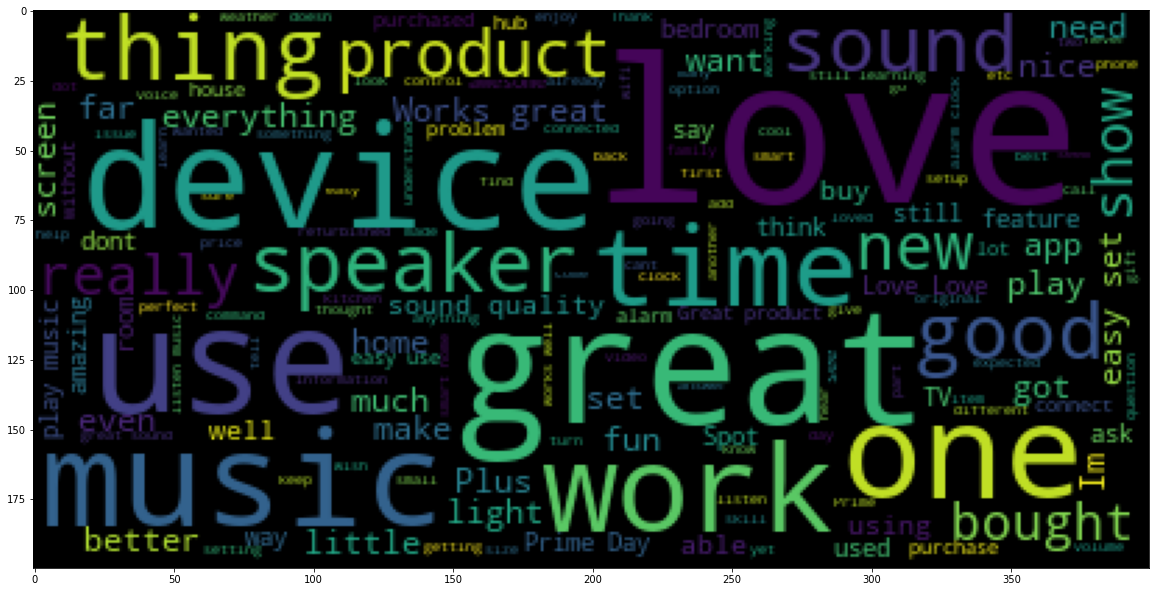

In [44]:
#------------------------------------------------------------------------------
# Draw WORDCLOUD to visualize the common
# after removing specified STOPWORDS
#------------------------------------------------------------------------------
#from wordcloud import WordCloud
sentences_as_one_string_clean_words = [word  for word in sentences_as_one_string_nopunc.split()  if word.lower() not in stop_words]
sentences_as_one_string_clean  = ' '.join(sentences_as_one_string_clean_words)
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_string_clean))

In [45]:
#---------------------------------------------------------------------
# Locate a specific occurence of a word in the sentence
# and print out some text before and aftere that word
#---------------------------------------------------------------------
BEFORE_LENGTH = 25
AFTER_LENGTH = 25
word_index = sentences_as_one_string_clean.find('dot')
#print (word_index)
print (sentences_as_one_string_clean[word_index-BEFORE_LENGTH:word_index+AFTER_LENGTH])

ime Day purchase get hub dots future See subject l


In [46]:
test_punc_removed

'Hello Mr Future I am so happy to be learning AI now  and also drinking beer'

In [47]:
test_punc_removed_clean = [word  for word in test_punc_removed.split()  if word.lower() not in stop_words]

In [48]:
test_punc_removed_clean

['Hello',
 'Mr',
 'Future',
 'happy',
 'learning',
 'AI',
 'also',
 'drinking',
 'beer']

In [49]:
#------------------------------------------------------------------------------------
# Mini Challenge
#
#  Remove punction and stop words from this phrase:
#
#------------------------------------------------------------------------------------
mini_challenge = "Here's a mini challenge, that will teach you how to remove stopwords and punctuations!"


In [50]:
mini_challenge_no_punc = [char for char in mini_challenge  if char not in string.punctuation]


In [51]:
#mini_challenge_no_punc

In [52]:
mini_challenge_no_punc  = ''.join(mini_challenge_no_punc)

In [53]:
mini_challenge_no_punc_clean = [word  for word in mini_challenge_no_punc.split()  if word.lower() not in stop_words]

In [54]:
mini_challenge_no_punc_clean 

['Heres', 'mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [55]:
mini_challenge_no_punc_clean  = ' '.join(mini_challenge_no_punc_clean)

In [56]:
mini_challenge_no_punc_clean

'Heres mini challenge teach remove stopwords punctuations'

# TASK 7: UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [57]:
#---------------------------------------------------------------------------------
# Use sklearn to do Count Vecrorization of words
#---------------------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [58]:
print (vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [59]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [60]:
#----------------------------------------------------------
# Mini Challenge:
#
#  Manually create word count vectorization then double
#  check it using sklearn
#----------------------------------------------------------
mini_challenge = ['Hello World', "Hello Hello World", "Hello World World World"]
#
# Manual vectorization
#
#                 Hello  World
# Sentence 1         1     1
# Sentence 2         2     1
# Sentence 3         1     3
#

#
# Using sklearn
#
vectorizer = CountVectorizer()
mini_challenge_vector = vectorizer.fit_transform(mini_challenge)

In [61]:
print (vectorizer.get_feature_names())

['hello', 'world']


In [62]:
print(mini_challenge_vector.toarray())
#
# This verifies out manual guess
#

[[1 1]
 [2 1]
 [1 3]]


![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)

# TASK #8: PERFORM DATA CLEANING BY APPLYING EVERYTHING WE LEARNED SO FAR!

In [63]:
#---------------------------------------------------------------------------------------------------
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
#---------------------------------------------------------------------------------------------------
def message_cleaning(message):
  test_punc_removed = [char for char in message  if char not in string.punctuation]
  test_punc_removed_join = ''.join(test_punc_removed)
  test_punc_removed_clean_words = [word  for word in test_punc_removed_join.split()  if word.lower() not in stop_words]
#  test_punc_removed_clean  = ' '.join(test_punc_removed_clean_words)
  return test_punc_removed_clean_words

In [64]:
# Let's test the newly added function
#print (message_cleaning("hello all you little shits I hope you're not mad"))
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [65]:
print (reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [66]:
print (reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [67]:
reviews_df_clean

0                                                  [Love]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [69]:
print (vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [70]:
print (reviews_countvectorizer)

  (0, 703)	1
  (1, 704)	1
  (2, 968)	1
  (2, 3712)	1
  (2, 2596)	1
  (2, 1356)	1
  (2, 3882)	1
  (2, 1940)	1
  (2, 4152)	1
  (2, 2656)	1
  (2, 5105)	1
  (2, 1359)	1
  (2, 3155)	1
  (2, 1197)	1
  (2, 4810)	1
  (2, 3150)	1
  (2, 1467)	1
  (2, 2801)	1
  (3, 3712)	1
  (3, 3155)	1
  (3, 3150)	1
  (3, 3221)	1
  (3, 2575)	1
  (3, 4687)	1
  (3, 115)	1
  :	:
  (3148, 4321)	1
  (3148, 1820)	1
  (3148, 4582)	1
  (3148, 4426)	1
  (3148, 3877)	2
  (3148, 4701)	1
  (3148, 2642)	1
  (3148, 2199)	1
  (3148, 2563)	1
  (3148, 2568)	1
  (3148, 2811)	1
  (3148, 4605)	1
  (3148, 3059)	1
  (3148, 2999)	1
  (3148, 3373)	1
  (3148, 599)	1
  (3148, 1449)	1
  (3148, 3100)	1
  (3148, 5127)	1
  (3148, 4505)	1
  (3148, 1849)	1
  (3148, 3334)	1
  (3148, 2810)	1
  (3148, 1591)	1
  (3149, 533)	1


In [71]:
print (reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
reviews_countvectorizer.shape

(3150, 5198)

In [73]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
#-------------------------------------
# feedback is the targer columns
# thay we are trying to predict
#-------------------------------------
reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [75]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [76]:
#----------------------------------------------------------------------
# Create dataframe for vectorized reviews column
#----------------------------------------------------------------------
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [77]:
reviews

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5158,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168,5169,5170,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
#-------------------------------------------------------------------
# Add vectorized review columns to our reviews_df data frame
#-------------------------------------------------------------------
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [79]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,5158,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168,5169,5170,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
#--------------------------------------------------------------------------
# Drop 'feedback' column since it's our target column
# This is our Input
#--------------------------------------------------------------------------
X = reviews_df.drop(['feedback'], axis = 1)

In [81]:
#--------------------------------------------------------------------------
# Set y to the 'feedback' column since it's our target column
# This is our Output
#--------------------------------------------------------------------------
y = reviews_df['feedback']

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

![alt text](https://drive.google.com/uc?id=1Xox54bvjhGOhrG-fSxEUIEgw1R3g-RIt)

![alt text](https://drive.google.com/uc?id=18Z4ug4UuyQG79lyPKs1zQwtrP_S4_yoU)

![alt text](https://drive.google.com/uc?id=1sVLtg8GaE3ZhNEZX1WJbxs7KAQyQ5dpX)

![alt text](https://drive.google.com/uc?id=1NT6Fm-lWUWNsu9i8uzVS4Q5pcm5gp8RK)

![alt text](https://drive.google.com/uc?id=1C32q5Uguymr9012x1lzRD5btnvJ-kW9r)

![alt text](https://drive.google.com/uc?id=1g5aXo5E-RIjRBy6-LLLA8gjG2j9dIL5X)

![alt text](https://drive.google.com/uc?id=106OXP_z89Hqh1JYVaROIbst0N0CgFRuT)

![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [82]:
#------------------------------------------------------------------------------
# 
#------------------------------------------------------------------------------
X.shape

(3150, 5213)

In [83]:
y.shape

(3150,)

In [84]:
#------------------------------------------------------------------------------
# Use sklearn to train and test the model
#------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
#----------------------------------------------------------------------------
# Use sklearn naive_bayes MultinomialNB
#----------------------------------------------------------------------------
from sklearn.naive_bayes import MultinomialNB

In [86]:
#----------------------------------------------------------------------------
# Istantiate the object
#----------------------------------------------------------------------------
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#----------------------------------------------------------------------------
# Make predictions with our model
#----------------------------------------------------------------------------

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

![alt text](https://drive.google.com/uc?id=14_ft6Wiu-VaiU_5Ew2nS7EGGr3oLLQf8)

In [87]:
#----------------------------------------------------------------------------
# Plot the Confusion Matrix - for the training dataset run
#----------------------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#----------------------------------------------------------------------------
# Istantiate the object
#----------------------------------------------------------------------------
NB_classifier = MultinomialNB()
NB_classifier.fit(X_test, y_test)

In [88]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([1, 1, 1, ..., 1, 1, 1])

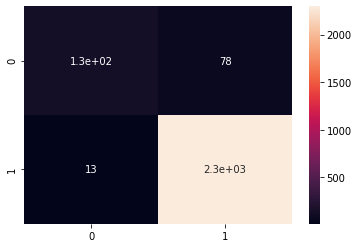

In [89]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

# TASK #12: ASSIGNMENT - TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [90]:
#----------------------------------------------------------------------------
# Plot the Confusion Matrix - for the Test dataset run
#
# Mini-Challenge
#
#----------------------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

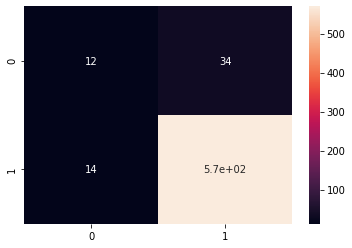

In [92]:
#-------------------------------------------------------------
# Print Confusuin Matrix for the Test dataset predictions
#
# Please note: The Test data set is unbalanced, there are a 
#              lot more positive classes, very small negative
#              reviews.
#-------------------------------------------------------------
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)


In [96]:
#------------------------------------------------------------------------------
#  Print Classification Report
#   - Precision
#   - Recall
#   - F1-Score
#------------------------------------------------------------------------------
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predict_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.46      0.26      0.33        46
     class 1       0.94      0.98      0.96       584

    accuracy                           0.92       630
   macro avg       0.70      0.62      0.65       630
weighted avg       0.91      0.92      0.91       630



In [97]:
#-----------------------------------------------------------------
# Implementing Logistic Regression Module for the same dataset
#-----------------------------------------------------------------
#-----------------------------------------------
# Implement the Linear classifier
#-----------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [99]:
#----------------------------
# Instantiate the Model
#----------------------------
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#-----------------------------------------------------------------------------------------
# Predict the outcome (Employee Stays-0 or Employee Leaves-1) based on the test dataset
#-----------------------------------------------------------------------------------------
y_pred_test = model_lr.predict(X_test)

In [101]:
# Testing Set Performance
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [102]:
#------------------------------------------------------------------------------
# Look at Accuracy of the prediction on data the model has never seen
#------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
print ('Accuracy {} %'.format( 100 * accuracy_score(y_pred_test, y_test)))

Accuracy 94.28571428571428 %


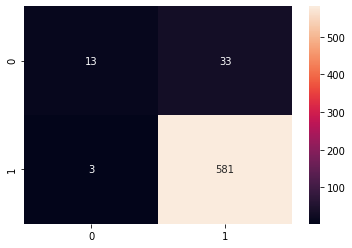

In [103]:
#-----------------------------------------------------------------
# Plot the Confusion Matrix
#-----------------------------------------------------------------
#
# Syntax: sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
#
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot = True, fmt='d')

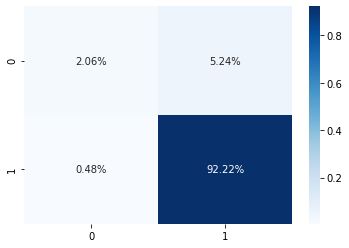

In [104]:
#-----------------------------------------------------------------------
# Print Confusion Matrix has precentages
#-----------------------------------------------------------------------
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [105]:
#------------------------------------------------------------------------------
#  Print Classification Report
#   - Precision
#   - Recall
#   - F1-Score
#------------------------------------------------------------------------------
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predict_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.46      0.26      0.33        46
     class 1       0.94      0.98      0.96       584

    accuracy                           0.92       630
   macro avg       0.70      0.62      0.65       630
weighted avg       0.91      0.92      0.91       630



# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS